In [1]:
import numpy
import math
import matplotlib.pyplot as pyplot
%matplotlib inline

# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

Problem:

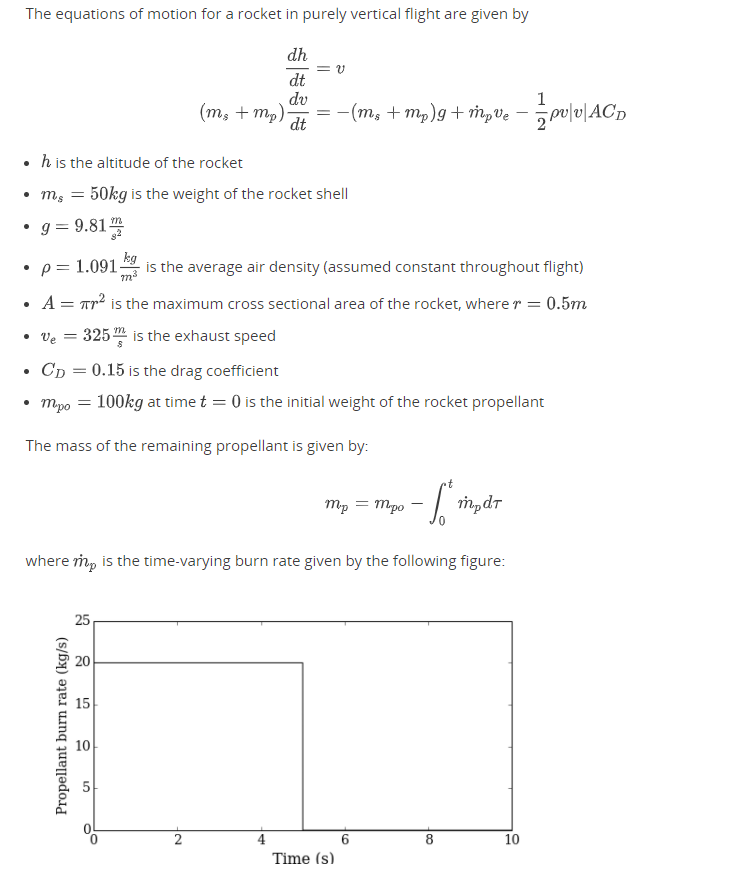

Using Euler's method with a timestep of dt = 0.1s , create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.  

Using the results from your code, answer the questions below concerning the flight of the rocket.

Solution (paper solving): 

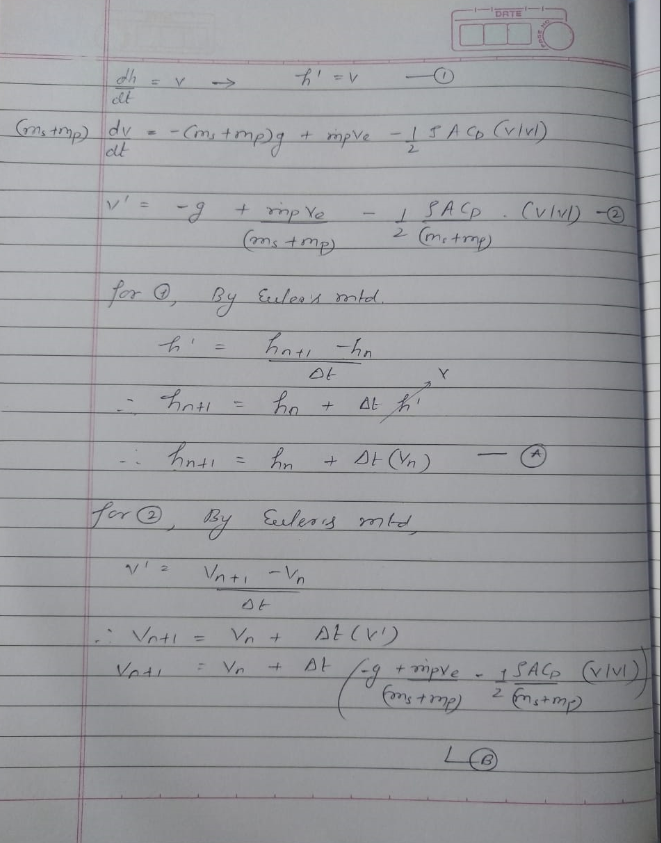

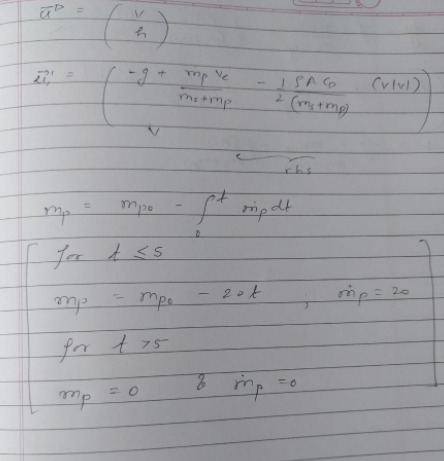

In [19]:
# Set parameters
g = 9.81
ve = 325.0
v0=0.0
h0 = 0.0
Cd = 0.15
rho = 1.091
r = 0.5
m_s = 50.0 #shell weight
m_p0 = 100.0

[  0.           3.35233333   6.76273724 ... -87.3638076  -87.36380762
 -87.36380764] 
 [ 0.00000000e+00  0.00000000e+00  3.35233333e-01 ... -5.47410320e+03
 -5.48283958e+03 -5.49157596e+03] 

Index of first negative h:  371 

Time of landing:  37.0 

Velocity at land:  -85.97591348035239 



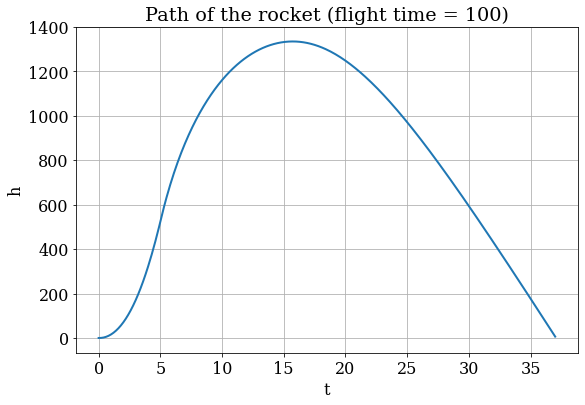

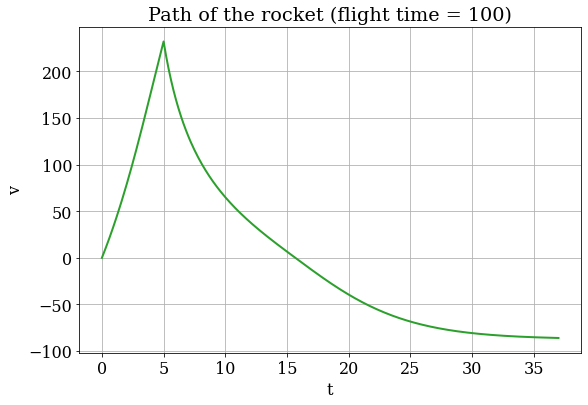

In [76]:
#create timesteps
dt = 0.1
T = 100
N = int(T/dt) + 1

for i in range(0, N):
    t = numpy.linspace(0.0, T, num = N)
    
# create arrays to store v, h at each time step
v = numpy.empty(N)
h = numpy.empty(N)

# initialize v, h
v[0] = v0
h[0] = h0


#solving by eulers method
for n in range(N-1):
    
    # defining the propellent weight as it is varying
    if t[n] < 5:
        m_dot_p = 20.0
        m_p = m_p0 - m_dot_p*t[n]
    else: 
        m_dot_p = 0.0
        m_p = 0
    
    #applying eulers method
    v[n+1] = v[n] + dt*(- g + ((m_dot_p*ve)/(m_s + m_p)) - ((0.5*rho*math.pi*(r**2)*Cd*v[n]*abs(v[n]))/(m_s + m_p)))
    
    h[n+1] = h[n] + dt*(v[n])
    
print(v,"\n", h, "\n")

# finding the time when the rocket landed/crashed

#idx_landed is the index of the first negative value of h.
#we do not find idx_landed = numpy.where(h == 0), because it gives the first step as result, when the rocket just launched
#hence it is better to find the first negative h's index and then limit till that index

idx_landed = numpy.where(h < 0)[0][0]
# the [0][0] is required becuase idx_landed = numpy.where(h<0) results in an array of arrays with all values of h<0. 
#the first [0] results the first array and the second [0] results in the element inside the array, thus making idx_landed an int.
print("Index of first negative h: ", idx_landed, "\n")
print('Time of landing: ', t[idx_landed - 1], "\n")
print('Velocity at land: ', v[idx_landed - 1], "\n")

pyplot.figure(figsize=(9.0, 6.0))
pyplot.title('Path of the rocket (flight time = {})'.format(T))
pyplot.xlabel('t')
pyplot.ylabel('h')
pyplot.grid()
pyplot.plot(t[:idx_landed], h[:idx_landed], color='C0', linestyle='-', linewidth=2);
pyplot.figure(figsize=(9.0, 6.0))
pyplot.title('Path of the rocket (flight time = {})'.format(T))
pyplot.xlabel('t')
pyplot.ylabel('v')
pyplot.grid()
pyplot.plot(t[:idx_landed], v[:idx_landed], color='C2', linestyle='-', linewidth=2);    

In [77]:
print("Max ht: ", numpy.max(h))
idx_max_ht = numpy.where(h == numpy.max(h))
print("Time at max ht: ", t[idx_max_ht])

print("Max v: ", numpy.max(v))
idx_max_v = numpy.where(v == numpy.max(v))
print("Time at max v: ", t[idx_max_v], "and ht at max v: ", h[idx_max_v])

Max ht:  1334.1829454303067
Time at max ht:  [15.7]
Max v:  232.1061334126179
Time at max v:  [5.] and ht at max v:  [523.52283429]
